In [15]:
import pandas as pd
import csv
f = open('../DATA_WOO/subway_fee.csv', encoding='euc-kr')
data = csv.reader(f)
header = next(data)
print(header)
i = 0
for row in data:
    print(row)
    if i>5:
        break
    i += 1
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jun-22', '1호선', '150', '서울역', '1150754', '1123193', '194717', '187155']
['Jun-22', '1호선', '151', '시청', '537067', '543569', '80671', '78279']
['Jun-22', '1호선', '152', '종각', '834173', '815704', '131987', '121717']
['Jun-22', '1호선', '153', '종로3가', '450317', '404106', '299617', '278151']
['Jun-22', '1호선', '154', '종로5가', '394420', '404105', '254236', '244555']
['Jun-22', '1호선', '155', '동대문', '212719', '198987', '117499', '118515']
['Jun-22', '1호선', '156', '신설동', '264825', '252339', '112362', '106855']


### 유임승차 대 무임승차 비율 계산
- rate = $ 유임승차 인원 \over 무임승차인원$

In [16]:
f = open('../DATA_WOO/subway_fee.csv', encoding='euc-kr')
data = csv.reader(f)
header = next(data)
print(header)
i = 0
rate = 0
max_rate = 0

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    rate = row[4]/ row[6]
    
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']


ZeroDivisionError: division by zero

#### 무임승차 인원이 0인 역 찾기

In [ ]:

f = open('../DATA_WOO/subway_fee.csv', encoding='euc-kr')
data = csv.reader(f)
header = next(data)
print(header)
i = 0
rate = 0
max_rate = 0

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    rate = row[4]/ (row[6]+row[4])

    if row[6] == 0:
        print(row)

    
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jun-22', '일산선', '1949', '지축', 10, 0, 0, 0]
['Jun-22', '경의선', '1296', '계양', 10, 0, 0, 0]
['Jun-22', '경의선', '1297', '검암', 2, 0, 0, 0]
['Jun-22', '6호선', '2615', '연신내', 31, 0, 0, 0]
['Jun-22', '6호선', '2649', '신내', 4, 0, 0, 0]
['Jun-22', '7호선', '2753', '까치울', 1, 0, 0, 0]
['Jun-22', '7호선', '2758', '상동', 1, 0, 0, 0]
['Jun-22', '7호선', '2761', '부평구청', 1, 0, 0, 0]


#### 최대 무임승차 비율 확인

In [ ]:
f = open('../DATA_WOO/subway_fee.csv', encoding='euc-kr')
data = csv.reader(f)
header = next(data)
print(header)
i = 0
rate = 0
max_rate = 0

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    if row[6] != 0:
        rate = 100 * row[6]/ (row[6]+row[4])
        if max_rate < rate:
            max_rate = rate
            print(row, round(rate, 2), '%') # 무임승차 퍼센트가 최고인 역 찾기

    
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jun-22', '1호선', '150', '서울역', 1150754, 1123193, 194717, 187155] 14.47 %
['Jun-22', '1호선', '153', '종로3가', 450317, 404106, 299617, 278151] 39.95 %
['Jun-22', '1호선', '157', '제기동', 218782, 209109, 263173, 281985] 54.61 %
['Jun-22', '경원선', '1916', '소요산', 32659, 25998, 62990, 56806] 65.86 %
['Jun-22', '7호선', '2756', '신중동', 0, 0, 1, 0] 100.0 %


#### 최소 무임승차 비율 확인( 0프로 제외)

In [ ]:
f = open('../DATA_WOO/subway_fee.csv', encoding='euc-kr')
data = csv.reader(f)
header = next(data)
print(header)
i = 0
rate = 0
min_rate = 100

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    if row[6] != 0:
        rate = 100 * row[6]/ (row[6]+row[4])
        if min_rate > rate:
            min_rate = rate
            print(row, round(rate, 2), '%') 

    
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jun-22', '1호선', '150', '서울역', 1150754, 1123193, 194717, 187155] 14.47 %
['Jun-22', '1호선', '151', '시청', 537067, 543569, 80671, 78279] 13.06 %
['Jun-22', '2호선', '201', '시청', 545554, 526572, 51342, 46078] 8.6 %
['Jun-22', '2호선', '209', '한양대', 269240, 295829, 12481, 13227] 4.43 %
['Jun-22', '3호선', '321', '충무로', 36, 0, 1, 0] 2.7 %


# 최대 유임 승차인원이 있는 역은?
- 10만명이 넘는 승하차하는 역에서 유임 승차비율이 제일 높은역은?


In [ ]:

f = open('../DATA_WOO/subway_fee.csv', encoding='euc-kr')
data = csv.reader(f)
header = next(data)
print(header)
i = 0
rate = 0
max_rate = 0
max_row = []
max_total_num = 0

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    if (row[4]+row[6] > 100000) & (row[6] != 0):
        rate = 100 * row[4]/ (row[6]+row[4])
        if max_rate < rate:
            max_rate = rate
            max_row = row
            max_total_num = row[4]+row[6]
print(max_row)
print(f'역이름: {max_row[3]}, 전체인원: {max_total_num}, 유임승차인원: {max_row[4]}, 유임비율: {round(max_rate,2)}')

    
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jun-22', '2호선', '209', '한양대', 269240, 295829, 12481, 13227]
역이름: 한양대, 전체인원: 281721, 유임승차인원: 269240, 유임비율: 95.57


#### 유임승차 비율이 50% 이하인 역은?

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jun-22', '1호선', '157', '제기동', 218782, 209109, 263173, 281985] 45.3946945254225 %
['Jun-22', '1호선', '159', '동묘앞', 122460, 131299, 146455, 147539] 45.53855307439154 %
['Jun-22', '경원선', '1916', '소요산', 32659, 25998, 62990, 56806] 34.14463298100346 %
['Jun-22', '중앙선', '1218', '원덕', 5854, 5749, 6959, 6739] 45.687973152267226 %
['Jun-22', '중앙선', '1219', '용문', 34168, 34477, 38467, 38202] 47.04068286638673 %
유임 승차 비율이 가장 낮은 역: 소요산, 전체인원: 95649, 유임승차인원: 32659, 유임비율: 34.14


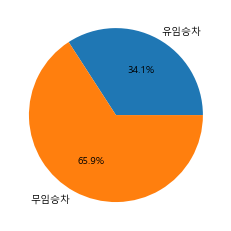

In [ ]:
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 설정
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path = '../FONT/malgun.ttf'
font_name = fm.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)
f = open('../DATA_WOO/subway_fee.csv', encoding='euc-kr')
data = csv.reader(f)
header = next(data)
print(header)
i = 0
rate = 0
total_count = 0
rate_list = 0
row_list = []
min_rate = 100
min_row = 0

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    total_count = row[4]+row[6] 
    if (total_count > 10000) & (row[6] != 0):
        rate = 100 * row[4]/ total_count
        if rate <= 50:
            print(row, rate, '%')
        if min_rate > rate:
            min_rate = rate
            min_row = row
            min_total = row[4]+row[6]

print(f'유임 승차 비율이 가장 낮은 역: {min_row[3]}, 전체인원: {min_total}, 유임승차인원: {min_row[4]}, 유임비율: {round(min_rate,2)}')

    
f.close()
# autopct -> auto percentage :소수점 1번째 자리까지 출력, %%: % 출력
plt.pie([min_row[4], min_row[6]], labels = ['유임승차', '무임승차'], autopct='%.1f%%')
plt.show()

In [ ]:
df = pd.read_csv('../DATA_WOO/subway_fee.csv', encoding='euc-kr')
df

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,Jun-22,1호선,150,서울역,1150754,1123193,194717,187155
1,Jun-22,1호선,151,시청,537067,543569,80671,78279
2,Jun-22,1호선,152,종각,834173,815704,131987,121717
3,Jun-22,1호선,153,종로3가,450317,404106,299617,278151
4,Jun-22,1호선,154,종로5가,394420,404105,254236,244555
...,...,...,...,...,...,...,...,...
610,Jun-22,신림선,4407,당곡,67329,63441,24803,23951
611,Jun-22,신림선,4408,신림,32979,45402,14286,15472
612,Jun-22,신림선,4409,서원,54559,46712,17717,17687
613,Jun-22,신림선,4410,서울대벤처타운,123769,120482,46688,47814


In [ ]:
df_sum = df.groupby(['지하철역']).sum()
df_sum['유임승차비율'] = 100 * df_sum['유임승차'] / (df_sum['유임승차'] + df_sum['무임승차'])

df_sum.sort_values('유임승차비율', ascending = False)

,역ID,유임승차,유임하차,무임승차,무임하차,유임승차비율
지하철역,,,,,,
부평구청,2761,1,0,0,0,100.000000
상동,2758,1,0,0,0,100.000000
까치울,2753,1,0,0,0,100.000000
한양대,209,269240,295829,12481,13227,95.569730
홍대입구,5735,2002177,2154594,115058,111526,94.565648
...,...,...,...,...,...,...
원덕,1218,5854,5749,6959,6739,45.687973
제기동,157,218782,209109,263173,281985,45.394695
지평,1220,952,1282,1216,1173,43.911439


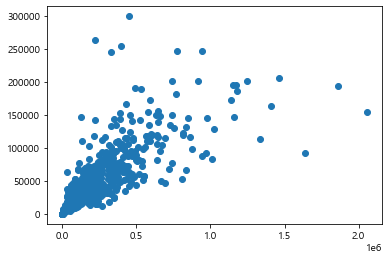

In [ ]:
plt.scatter(df['유임승차'], df['무임승차'])

### 승하차 인원이 가장많은 역은?

In [ ]:
import csv
max = [0] * 4
station = ['']*4
label= ['유임승차', '유임하차', '무임승차', '무임하차']
with open('../DATA_WOO/subway_fee.csv', encoding='euc-kr') as f:
    data = csv.reader(f)
    next(data)

    for row in data:
        for i in range(4,8):
            row[i] = int(row[i])
            if row[i] > max[i-4]:
                max[i-4] = row[i]
                station[i-4] = row[3] + ' ' + row[1]


for i in range(4):
    print(f'{label[i]}: {station[i]} {max[i]}')



유임승차: 강남 2호선 2055521
유임하차: 강남 2호선 2039847
무임승차: 종로3가 1호선 299617
무임하차: 제기동 1호선 281985


In [ ]:
import pandas as pd
df = pd.read_csv('../DATA_WOO/subway_fee.csv', encoding='euc-kr')
col = list(df.columns[4:8])

for i in col:
    cond = df[i].idxmax()
    print(df.loc[cond, '지하철역'])
    print(df.loc[cond, '호선명'])


강남
2호선
강남
2호선
종로3가
1호선
제기동
1호선


### 전체 지하철역 승하차 인원 분석 및 저장
- savefig 를 이용하면 사진파일 저장

In [19]:
import	csv
import	matplotlib.pyplot as	plt
# Matplotlib 한글 폰트 설정
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path = '../FONT/malgun.ttf'
font_name = fm.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)
# savefig 를 이용하면 사진파일 저장
import csv
max = [0] * 4
station = ['']*4
label= ['유임승차', '유임하차', '무임승차', '무임하차']
c = ['#14CCC0',	'#389993',	'#FF1C6A',	'#CC14AF']
with open('../DATA_WOO/subway_fee.csv', encoding='euc-kr') as f:
    data = csv.reader(f)
    next(data)

    for row in data:
        for i in range(4,8):
            row[i] = int(row[i])

            plt.figure(dpi=100)
            plt.title(row[3]+ ' '+row[1])
            plt.pie(row[4:8], labels=label, colors=c, autopct='%.1f%%')
            plt.savefig(row[3]+ ' '+ row[1]+'.png')
            plt.close()



유임승차:  0
유임하차:  0
무임승차:  0
무임하차:  0
